In [1]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import gensim
import pickle
import time
import numpy as np
#coding:utf-8
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
file_path = './dataset/enwiki-tiny-choose.txt'

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format(
        '/home/chenyiwei/Projects/NLP/Assignment1/model/enwiki_glove_vectors.txt', binary=False)
print('load the model')

load the model


In [4]:
model.most_similar('disease')

[('diseases', 0.7583001852035522),
 ('infectious', 0.6295328140258789),
 ('infection', 0.5969638824462891),
 ('cause', 0.5785838961601257),
 ('cancer', 0.5774367451667786),
 ('alzheimer', 0.5736707448959351),
 ('chronic', 0.5632277131080627),
 ('causes', 0.5534259080886841),
 ('illness', 0.5500096678733826),
 ('disorders', 0.5490403771400452)]

In [5]:
def word_list(file_path):
    lines = open(file_path).readlines()
    # print(lines)
    word_list = []
    for line in lines:
        word = line.replace('\n', '')
        # print(word)
        word_list.append(word)
        # word_list.append(line)
    return word_list

In [6]:
words = word_list(file_path)
# # print(words)
# words.remove('hiv')
# words.remove('bmi')
# words.remove('il')
# words.remove('vas')
# words.remove('qol')
# # print(words)

In [7]:
dataset = []
for word in words:
    dataset.append(model.get_vector(word))

In [8]:
dataset_embedded = TSNE(n_components=2, early_exaggeration=6).fit_transform(dataset)

/home/chenyiwei/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chenyiwei/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


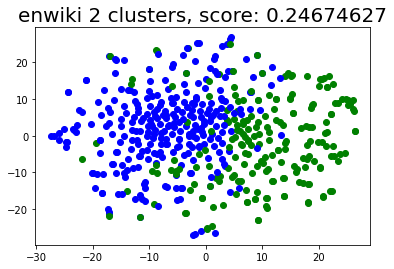

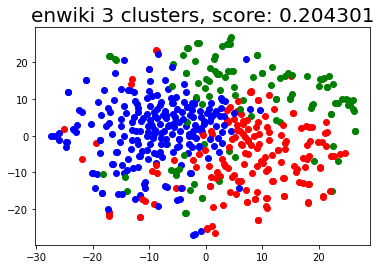

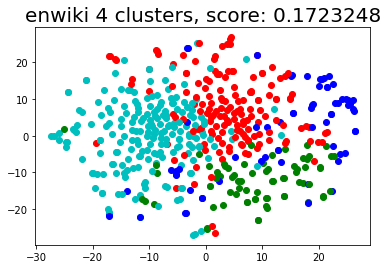

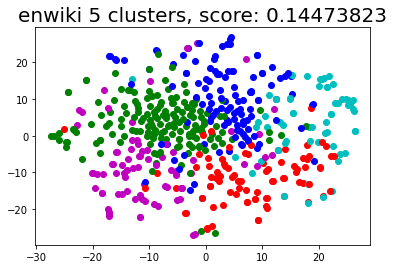

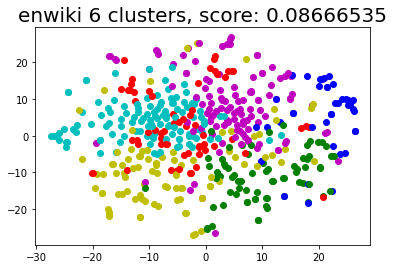

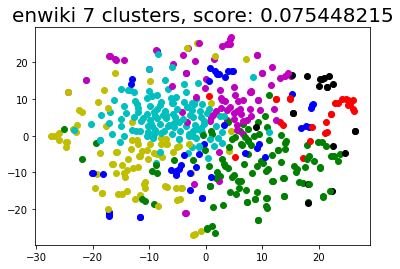

In [10]:
for num_cluster in range(2, 8):
    # do the kmeans algorithm
    km_cluster = KMeans(n_clusters=num_cluster, max_iter=3000, init='k-means++')
    km_cluster.fit(dataset)
    # start draw the image
    cents = km_cluster.cluster_centers_  # the centroid
    '''for cent in cents:
        idx = get_key(dataset, cent)
        print(idx)
        plt.scatter(dataset_embedded[idx][0], dataset_embedded[idx][1], c='r', marker='*')'''
    labels = km_cluster.labels_
    score = metrics.silhouette_score(dataset_embedded, labels)
    mark = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    j = 0   # to count the point in the dataset
    '''flag = 0   # to judge which cluster should the point belog
    n_p = 0    # to count how many point already been drew
    for label in labels:
        if flag == num_cluster:
            break
        if label == flag:
            plt.scatter(dataset_embedded[j][0], dataset_embedded[j][1], c=mark[label])
            n_p += 1
        if n_p == num_point:
            n_p = 0
            flag += 1
        j += 1'''
    for label in labels:
        plt.scatter(dataset_embedded[j][0], dataset_embedded[j][1], c=mark[label])
        j += 1
    plt.title('enwiki '+str(num_cluster)+' clusters, score: ' + str(score), fontsize=20)
    plt.savefig('./enwiki_image/enwiki_score_glove_' + str(num_cluster) + '_clusters.jpg')
    plt.show()

In [11]:
words= ['eye','ear','eyeball','mouth',"eyebrow","wrist","lip","hand","finger",'forehead','bike','biking','motorcycle','scotter','bicycle','motorbike','motorcross','bus','car','taxi','orange','banana','watermelon','pineapple','pear',"cherry",'lemon','coconut','apple','mango','chemistry','physics','biology','geophysics','microbiology',"ecology",'biochemistry','biophysics','immunology','history']
word1 = ['dog','elephant','lion','horse','cat','deer','monkey','frog','duck','rabbit']
words = words + word1

In [12]:
# words = []
# w_list = ['injection','system', 'acid', 'disease', 'syndrome']
# for w in w_list:
#     list = model.most_similar(w) 
#     for item in list:
#         words.append(item[0])
# words

/home/chenyiwei/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chenyiwei/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


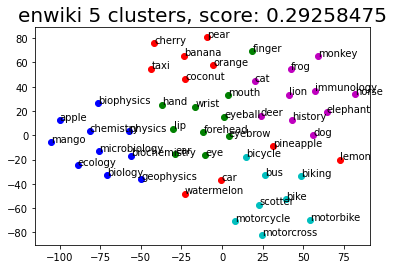

In [13]:
dataset2 = []
for word in words:
    try:
        dataset2.append(model.get_vector(word))
    except:
        pass
dataset_embedded = TSNE(n_components=2, early_exaggeration=6).fit_transform(dataset2)
        # for diff num of clusters, to do the cluster algorithm
for num_cluster in range(5, 6):
    # do the kmeans algorithm
    km_cluster = KMeans(n_clusters=num_cluster, max_iter=3000, init='k-means++')
    km_cluster.fit(dataset2)
    # start draw the image
    cents = km_cluster.cluster_centers_  # the centroid

    labels = km_cluster.labels_
    score = metrics.silhouette_score(dataset_embedded, labels)
    mark = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    j = 0   # to count the point in the dataset

    from sklearn import metrics
    score = metrics.silhouette_score(dataset_embedded, labels)



    for label in labels:
        plt.scatter(dataset_embedded[j][0], dataset_embedded[j][1], c=mark[label])
        plt.annotate(words[j],xy=(dataset_embedded[j][0], dataset_embedded[j][1]),xytext=(dataset_embedded[j][0]+0.1, dataset_embedded[j][1]+0.1))
        j += 1
    plt.title('enwiki '+str(num_cluster)+' clusters, score: ' + str(score) , fontsize=20)
    plt.savefig('./enwiki_image/' + 'enwiki_score_glove_CaseStudy_'+ str(num_cluster) + '_cluster.jpg',dpi=500)
    plt.show()